In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Optical calculation
I often like to drive my systems at / near the plasmon resonance. To find it, we can run a spectrum using `g-dda.` 
### Step 1: Define shape and make directories
Set the lattice spacing and radius of the sphere, and make the input files in the following lines. 

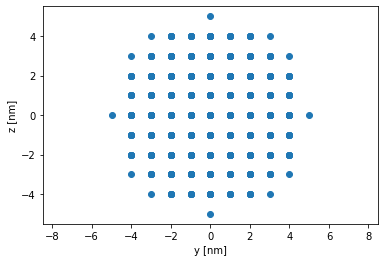

In [2]:
from make_sphere import Generate_Sphere

lat_space = 1 # lattice spacing in nm
radius = 5 # radius of sphere in nm

gen_shape = Generate_Sphere(lat_space=lat_space, radius_nm=radius)
gen_shape.write_shape() # write the shape to a file
gen_shape.plot_shape() # plots the shape

In [3]:
%%bash
../../../g-dda/source_code/ddscat &> output.txt

In [4]:
%%bash
python sphere_qabs.py
../../source_code/Lattice_Diffusion ../../lattice_greenfunction/Green_grid20.txt var.par tdda_input temp.out


### Step 6: Plot the temperature maps
`t-dda` is hardcoded to calculate the temperatures of all the discrete dipoles, as well as any points along the plane specified in the last line of `var.par`. We will plot this plane as a 2D image, or as a 1D slice in the codes below. 

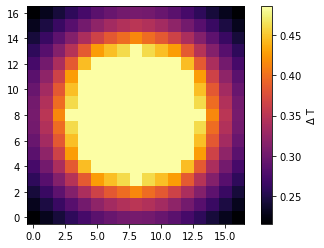

In [5]:
temp_data = np.loadtxt('temp.out')
idx = np.where(temp_data[:,0] == -6)
DS = 1
y = temp_data[idx,1][0]*DS
z = temp_data[idx,2][0]*DS
T = temp_data[idx,3][0]

idx_sort = np.lexsort((y, z))
new_y = y[idx_sort]
new_z = z[idx_sort]
new_temps = T[idx_sort]
y_wind = int(max(y/DS) - min(y/DS) + 1); z_wind = int(max(z/DS) - min(z/DS) + 1)
temp_grid = new_temps.reshape(z_wind, y_wind, order='c')
plt.imshow(temp_grid,origin='lower',cmap='inferno')
plt.colorbar(label='$\Delta$ T')

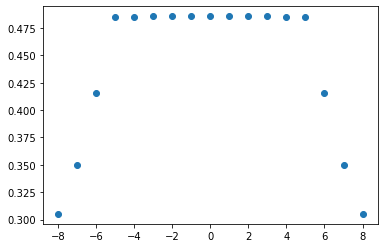

In [6]:
temp_data = np.loadtxt('temp.out')
idx = np.where((temp_data[:,0] == -6) & (temp_data[:,1] == 0 ))
DS = 1
y = temp_data[idx,1][0]*DS
z = temp_data[idx,2][0]*DS
T = temp_data[idx,3][0]
plt.scatter(z, T)

In [7]:
print(max(T))

0.485751
